# Multivariate analysis: Modeling

![](https://docs.microsoft.com/en-us/azure/machine-learning/team-data-science-process/media/overview/tdsp-lifecycle2.png "Data Science Lifecycle")

Interesting sources: 
- https://learn.datacamp.com/courses/machine-learning-with-tree-based-models-in-python
- https://www.datacamp.com/community/tutorials/decision-tree-classification-python

We have seen that we can uncover correlations by using bivariate analyis. This also raises the question: If we extract information from multiple columns (Multivariate analysis), could we use these correlations to calculate/predict the value of a column for rows that do not yet have a value?

For example:
- Can we calculate if a customer will churn (= We lose the customer)?
- Can we calculate if a customer would use a certain product? (Product recommendation)
- Can we calculate if a mail is spam or not?
- Can we calculate if a financial transaction is fraudulent or not?
- Can we calculate if a customer will be able to pay back their loan or not?
- Can we calculate the price people are willing to pay for a house?
- Can we calculate the salary a student will earn in the future?
- ...

Just as we used math/statistics to support to explore the data one column at a time (Univariate) and per combination of two columns (Bivariate analysis), we will use machine learning algorithms to extract information across multiple columns (Multivariate analysis) and to build data products. 

Machine learning is:
- Machine learning is a method of data analysis that automates analytical model building. It is a branch of artificial intelligence based on the idea that systems can learn from data, identify patterns and make decisions with minimal human intervention. (https://www.sas.com/en_us/insights/analytics/machine-learning.html#:~:text=Machine%20learning%20is%20a%20method,decisions%20with%20minimal%20human%20intervention.)
- Machine learning (ML) is the study of computer algorithms that improve automatically through experience.[1] It is seen as a part of artificial intelligence. Machine learning algorithms build a model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so.[2] Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or unfeasible to develop conventional algorithms to perform the needed tasks. (https://en.wikipedia.org/wiki/Machine_learning)

Examples of data products could include:
- A product recommender
- A customer churn predictor
- A mail labeler (Primary, promotion, social, spam, etc.)
- Sentiment analyser for social media messages
- ...

![](https://miro.medium.com/max/1204/1*qYoU2VTBsORAfhkfiluURQ.png)

We will refer to the column that we are trying to calculate as the <b>target variable</b>. The columns used for this calculation will be refered to as the <b>feature variables</b>.

For example, if we want to predict a person's shoe size based on their body length:
- The shoe size is the target variable
- The body length is the feature variable

Extra info: The terms 'target' and 'feature' are borrowed from the field of Machine Learning. In the field of statistics, we refer to the target variable as the dependent variable and we refer to the feature variables as the independent variables.

# Classification

When the target variable is a categorical variable then we refer to this task as a classification task.

Examples of classification tasks:
- Predict if a customer will churn. 
- Predict if a customer will use a specific product.
- Label mails as spam.
- Label financial transactions as fraudulent.
- Label a social media message as positive, neutral or negative.
- Predict if a customer of the bank will be able to pay back the loan.

Examples of machine learning algorithms that we could use for classification:
- Decision trees
- Random forests
- Logistic regression
- Neural networks
- Naive bayes

In [25]:
import pandas as pd
import seaborn as sns
import numpy as np

In [26]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


![](https://miro.medium.com/max/1000/1*Hh53mOF4Xy4eORjLilKOwA.png "Iris dataset") 

## Training the model

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
features= ['sepal_length']
dt = DecisionTreeClassifier(max_depth = 1) # Increase max_depth to see effect in the plot
dt.fit(iris[features], iris['species'])

DecisionTreeClassifier(max_depth=1)

`conda install -c anaconda graphviz`  
`conda install -c anaconda python-graphviz`  
`conda install -c anaconda pydot`  
If the code below still does not work, install from here: (https://graphviz.org/download/)  

In [29]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

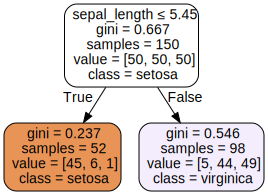

In [30]:
plot_tree_classification(dt, features, np.sort(iris.species.unique()))

## Evaluating the model

In [31]:
predictions = dt.predict(iris[features])

In [32]:
predictions

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'virginica', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica',

In [33]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [34]:
calculate_accuracy(predictions, iris.species)

0.6266666666666667

### Test/train split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
iris_train, iris_test = train_test_split(iris, test_size=0.3, random_state=42, stratify=iris['species'])
print(iris_train.shape, iris_test.shape)

(105, 5) (45, 5)


In [37]:
features= ['sepal_length', 'sepal_width']
dt_classification = DecisionTreeClassifier(max_depth = 10) # Increase max_depth to see effect in the plot
dt_classification.fit(iris_train[features], iris_train['species'])

DecisionTreeClassifier(max_depth=10)

### Overfitting

In [38]:
predictionsOnTrainset = dt_classification.predict(iris_train[features])
predictionsOnTestset = dt_classification.predict(iris_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, iris_train.species)
accuracyTest = calculate_accuracy(predictionsOnTestset, iris_test.species)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.9333333333333333
Accuracy on test set 0.6444444444444445


## Portfolio assignment 15
30 min: Train a decision tree to predict the species of a penguin based on their characteristics.
- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accuracy different? Did you expect this difference?
- Use the plot_tree_classification function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

Optional: Perform the same tasks but try to predict the sex of the pinguin based on the other columns

In [39]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


![](https://i.imgur.com/0v1CGNV.png)

## Portfolio assignment 16
30 min: Train a decision tree to predict one of the categorical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?
    
![](https://i.imgur.com/0v1CGNV.png)

# Regression

When the target variable is a numerical variable then we refer to this task as a regression task.

Examples of regression tasks:
- Predict the price people are willing to pay for a house.
- Predict the salary a student will earn in the future.

Examples of machine learning algorithms that we could use for regression:
- Decision trees
- Random forests
- Linear regression
- Neural networks

In [40]:
iris.corr() # to find out which features correlate with sepal_length

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [41]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
features= ['petal_length'] # add 'petal_width' ('species' does not work; categorical is not implemented in DT of sciki learn)
dt_regression = DecisionTreeRegressor(max_depth = 1) # Increase max_depth to see effect in the plot
dt_regression.fit(iris_train[features], iris_train['sepal_length'])

DecisionTreeRegressor(max_depth=3)

In [49]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

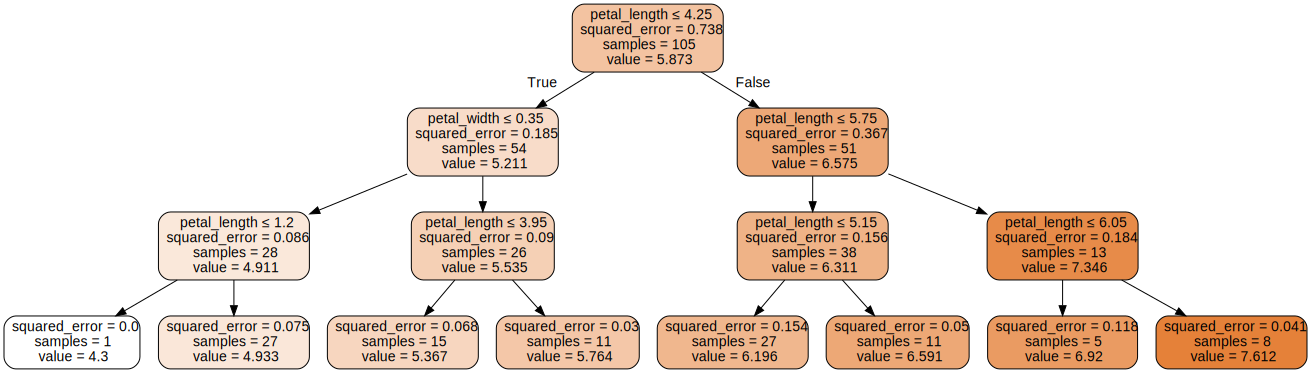

In [50]:
plot_tree_regression(dt_regression, features)

## Evaluating the model

![](http://www.aimlfront.com/images/rmse1.png "RMSE")

In [45]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [46]:
predictionsOnTrainset = dt_regression.predict(iris_train[features])
predictionsOnTestset = dt_regression.predict(iris_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, iris_train.sepal_length)
rmseTest = calculate_rmse(predictionsOnTestset, iris_test.sepal_length)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 0.5227236006263037
RMSE on test set 0.5093039370846077


## Portfolio assignment 17
30 min: Train a decision tree to predict the body_mass_g of a penguin based on their characteristics.
- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the RMSE for both the train set predictions and test set predictions.
- Is the RMSE different? Did you expect this difference?
- Use the plot_tree_regression function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

In [47]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Portfolio assignment 18
30 min: Train a decision tree to predict one of the numerical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the RMSE for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?
    
![](https://i.imgur.com/0v1CGNV.png)